In [1]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr

pd.set_option('display.max_rows', None)

## Open communication Correlation

In [2]:
%store -r open_communication
%store -r hospitals_personalInfo

In [3]:
open_communication

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
0,2,1,4
1,2,1,4
2,3,4,2
3,4,4,4
4,3,5,5
5,3,4,4
6,4,4,2
7,3,5,5
8,2,5,4
9,5,5,5


In [4]:
absolute_frequencies = open_communication.apply(lambda x: x.value_counts())
absolute_frequencies


,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1,15,3,2
2,24,7,12
3,37,20,28
4,17,42,32
5,10,31,29


<AxesSubplot:>

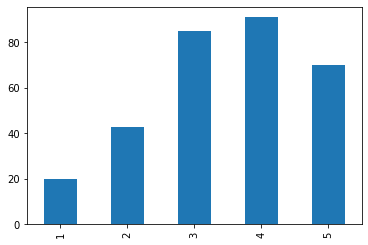

In [5]:
absolute_frequencies_sum = absolute_frequencies.sum(axis=1)
absolute_frequencies_sum.plot.bar()

In [6]:
relative_frequencies = open_communication.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
1,0.145631,0.029126,0.019417
2,0.233010,0.067961,0.116505
3,0.359223,0.194175,0.271845
4,0.165049,0.407767,0.310680
5,0.097087,0.300971,0.281553


In [7]:
positive_answers = relative_frequencies.iloc[3:6].sum().sum()/3
positive_answers

0.5210355987055015

In [8]:
open_communication.describe()

,4. Το προσωπικό μπορεί ελεύθερα να αμφισβητήσει τις αποφάσεις ή τις ενέργειες των ανωτέρων του.,2. Το προσωπικό μιλάει ελεύθερα όταν διαπιστώσει κάτι που επιδρά αρνητικά στη φροντίδα υγείας του ασθενούς.,"6. Το προσωπικό φοβάται να ρωτήσει, όταν κάτι δεν φαίνεται σωστό."
count,103.000000,103.000000,103.000000
mean,2.834951,3.883495,3.718447
std,1.163978,1.012674,1.061053
min,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


## Correlation Analysis between parameter and personal info

In [9]:
# individual score to parameter 

score = open_communication.sum(axis=1)/3


### Gender correlation

In [10]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [11]:
# create a frame with gender and score
gender = pd.concat([gender,score],axis=1)

gender.columns = ['Gender','Score']

### Education Correlation

In [12]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']
education = pd.concat([education,score],axis=1)

education.columns = ['Education','Score']

In [13]:
education.groupby('Education')['Score'].mean()

Education
1. Δευτεροβάθμια (Δ.Ε.)     3.611111
2. Τεχνολογική (Τ.Ε.)       3.551724
3. Πανεπιστημιακή (Π.Ε.)    3.388889
Name: Score, dtype: float64

In [14]:
# Avnova test for education score correlation

model = ols('Score ~ Education', data=education).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Education,0.672580,2.0,0.453802,0.63655
Residual,71.881865,97.0,NaN,NaN


### Profession Correlation

In [15]:
proffesion = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']
proffesion= pd.concat([proffesion,score],axis=1)

proffesion.columns = ['Proffesion','Score']

proffesion = proffesion.dropna()

In [16]:
proffesion.groupby('Proffesion')['Score'].mean()

Proffesion
1. Ειδικευόμενος ιατρός    3.351852
2. Ειδικός ιατρός          3.500000
3. ΠΕ Νοσηλευτής           3.611111
4. ΤΕ Νοσηλευτής           3.549708
5. ΔΕ Βοηθός Νοσηλευτή     3.291667
Name: Score, dtype: float64

In [17]:
# Anova score for correlation Score Proffesion

model = ols('Score ~ Proffesion', data=proffesion).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
Proffesion,0.950182,4.0,0.30911,0.871242
Residual,72.237248,94.0,NaN,NaN


### Working Hours Correlation

In [18]:
workingHours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']



In [19]:

workingHours = pd.concat([workingHours,score],axis=1)

workingHours.columns = ['WeeklyHours','Score']

### Age Correlation

In [20]:
age = hospitals_personalInfo['2. Ηλικία…']


In [21]:
ageScore = pd.concat([age,score],axis=1)

ageScore.columns = ['Age','Score']


ageScore = ageScore.dropna()

In [22]:
ageScore

,Age,Score
0,23.0,2.333333
1,45.0,2.333333
2,55.0,3.000000
3,61.0,4.000000
4,50.0,4.333333
5,48.0,3.666667
6,55.0,3.333333
7,39.0,4.333333
8,40.0,3.666667
9,55.0,5.000000


In [23]:
print(ageScore.corr(method ='pearson'))

            Age     Score
Age    1.000000  0.066448
Score  0.066448  1.000000


In [24]:
pearsonr(ageScore['Age'], ageScore['Score'])

(0.06644845019092033, 0.5156372484773016)